Removing Missing values and exploring dataset

Here we used Titanic dataset

In [74]:
##Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
dataset = pd.read_csv('/Users/nandrajog/Downloads/titanic.csv',low_memory=False)

In [18]:
print(dataset.isna().sum())
print("##### Null value by Mean ####")
print(dataset.isna().mean())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
##### Null value by Mean ####
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64


In [25]:
pd.DataFrame(dataset.isna().sum())

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Let's go ahed and look at how many observation we could drop 

In [22]:
print('total passenger with values in all variables:', dataset.dropna().shape[0])
print("total passenger in titanic:", dataset.shape[0])
print('Percentage of data without missing value:', dataset.dropna().shape[0]/(dataset.shape[0]))

total passenger with values in all variables: 183
total passenger in titanic: 891
Percentage of data without missing value: 0.2053872053872054


if we look the table above it shows that Embarked has only 2 missing values

In [26]:
dataset[dataset.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


1) Here we crate a new feature called age_null and fill with zero

2) Then we look for the null values in  Age feature and fill the corresponding value with 1 in age_null feature 

In [28]:
dataset['Age_null'] = 0
dataset.loc[dataset.loc[np.where(dataset.Age.isnull())].index, 'Age_null']=1

In [29]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [35]:
dataset.groupby(['Age_null'])['Survived'].sum()

Age_null
0    290
1     52
Name: Survived, dtype: int64

In [41]:
dataset.groupby(['Age_null'])['Fare'].mean()

Age_null
0    34.694514
1    22.158567
Name: Fare, dtype: float64

The below histogram shows that people pay less when the age is missing, Whereas blue represent the original data
& red represent data without missing values

Text(0, 0.5, 'Number of Passengers')

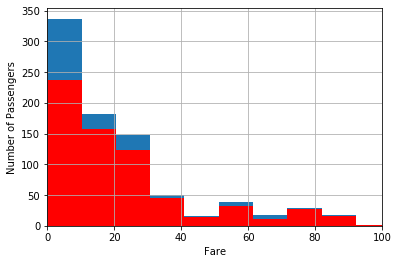

In [73]:
fig = plt.figure()
ax = fig.add_subplot(111)
dataset.Fare.hist(bins=50,ax=ax)
dataset.dropna(axis=0,subset=['Age'])['Fare'].hist(bins=50,ax=ax,color ='red')
ax.set_xlim(0,100)
ax.set_xlabel('Fare')
ax.set_ylabel('Number of Passengers')

In [64]:
dataset.groupby(['Age_null'])['Pclass'].mean()

Age_null
0    2.236695
1    2.598870
Name: Pclass, dtype: float64

Text(0, 0.5, 'Number of Passengers')

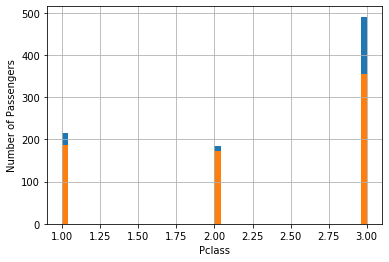

In [71]:
fig = plt.figure()
ax = fig.add_subplot(111)
dataset.Pclass.hist(bins =50)
dataset.dropna(axis=0,subset=['Age'])['Pclass'].hist(bins=50)
ax.set_xlabel('Pclass')
ax.set_ylabel('Number of Passengers')

Here we obesered the ### COMPLETE CASE ANALYSIS ###  is not a good option here if we remove or drop the missing values then we only left with 183 variables and that's not a good way to train any ML algorithm 

Less data poor prediction



.

.








Here we used House Price Predicton dataset 

In [124]:
house_price = pd.read_csv('/Users/nandrajog/Downloads/House-price.csv',low_memory=False)

In [125]:
##make the dataframe with missing values per variable

house_price_na = house_price.isna().mean()
house_price_na= pd.DataFrame(house_price_na.reset_index())

In [126]:
house_price_na.columns = ['variable', 'na_percentage']

In [127]:
house_price_na.head()

,variable,na_percentage
0,Id,0.000000
1,MSSubClass,0.000000
2,MSZoning,0.000000
3,LotFrontage,0.177397
4,LotArea,0.000000


In [128]:
house_price_na[house_price_na.na_percentage !=0].head()

,variable,na_percentage
3,LotFrontage,0.177397
6,Alley,0.937671
25,MasVnrType,0.005479
26,MasVnrArea,0.005479
30,BsmtQual,0.025342


In [129]:
print("total number of rows", house_price_na.shape[0])
print('rows with NA', house_price_na[house_price_na.na_percentage !=0].shape[0])

total number of rows 81
rows with NA 19


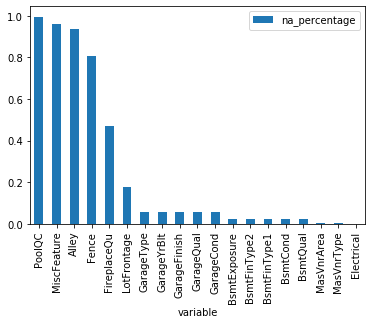

In [144]:
house_data = house_price_na.set_index(['variable'])
house_data[house_data.na_percentage !=0].sort_values(by = 'na_percentage',ascending =False).plot.bar()

Here what we can do we can remove missing values or drop missing values from "GARAGE TYPE" TO "ELECTRICAL" because those values or very small

But we can't remove all the missing values because we will remian witl very less data and ML does not perfrom well when dataset is very small 